In [1]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Data Understanding

In [3]:
df_hcm = pd.read_excel('HCMC_location.xlsx',
                     sheet_name='Location')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df_hcm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
STT               24 non-null int64
ID                24 non-null int64
Name              24 non-null object
Bourough          24 non-null object
Postal cost       0 non-null float64
Latitude          24 non-null float64
Longitude         24 non-null float64
Population        24 non-null float64
Population_all    24 non-null int64
Avg_land_price    24 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.0+ KB


In [5]:
df_hcm.drop(['STT'], axis=1)
df_hcm.head()

,STT,ID,Name,Bourough,Postal cost,Latitude,Longitude,Population,Population_all,Avg_land_price
0,1,760,Quận 1,"Vietnam, Quan 1",NaN,10.775659,106.700424,193.632,193632,59852096
1,2,761,Quận 12,"Vietnam, Quan 12",NaN,10.867153,106.641332,510.326,510326,3505942
2,3,762,Quận Thủ Đức,"Vietnam, Thu Duc",NaN,10.849409,106.753705,528.413,528413,5249286
3,4,763,Quận 9,"Vietnam, Quan 9",NaN,10.842840,106.828685,290.620,290620,3337584
4,5,764,Quận Gò Vấp,"Vietnam, Go Vap",NaN,10.838678,106.665290,634.146,634146,9873267


In [6]:
address = 'Ho Chi Minh, Vietnam'

geolocator = Nominatim(user_agent="hcm_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ho Chi Minh city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Ho Chi Minh city are 10.7758439, 106.7017555.


In [7]:
# create map of Hochiminh city using latitude and longitude values
map_hcmc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_hcm['Latitude'], df_hcm['Longitude'], df_hcm['Bourough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hcmc)  
    
map_hcmc

In [8]:
hcmc_geo = df_hcm.to_json(orient='index')
df_hcm.to_json('hcmc.json', orient='index')

# Data Analysis

## Population

In [11]:
import matplotlib.pyplot as plt

In [12]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

In [13]:
hcm1 = df_hcm.sort_values("Population_all")

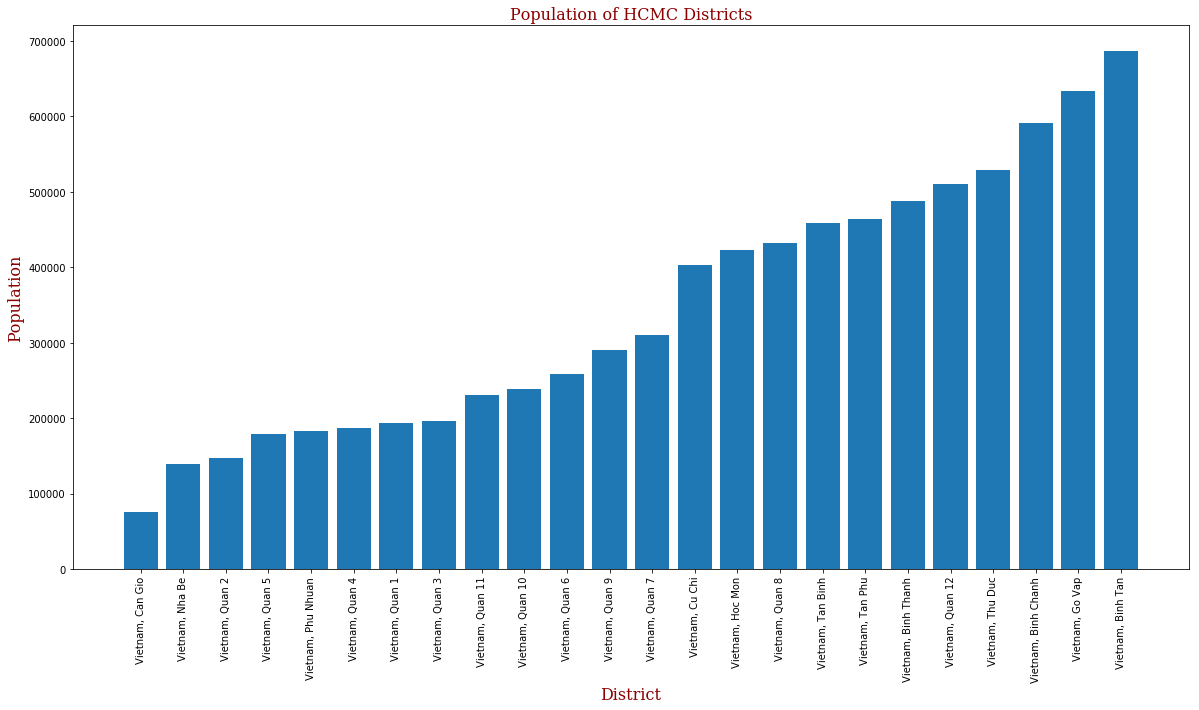

In [14]:
plt.figure(figsize=(20, 10))
plt.bar(hcm1.Bourough, hcm1.Population_all)
plt.xlabel("District", fontdict=font)
plt.ylabel("Population", fontdict=font)
plt.xticks(rotation=90)
plt.title("Population of HCMC Districts", fontdict=font)
plt.show()

In [15]:
hcm1 = df_hcm.sort_values("Avg_land_price")

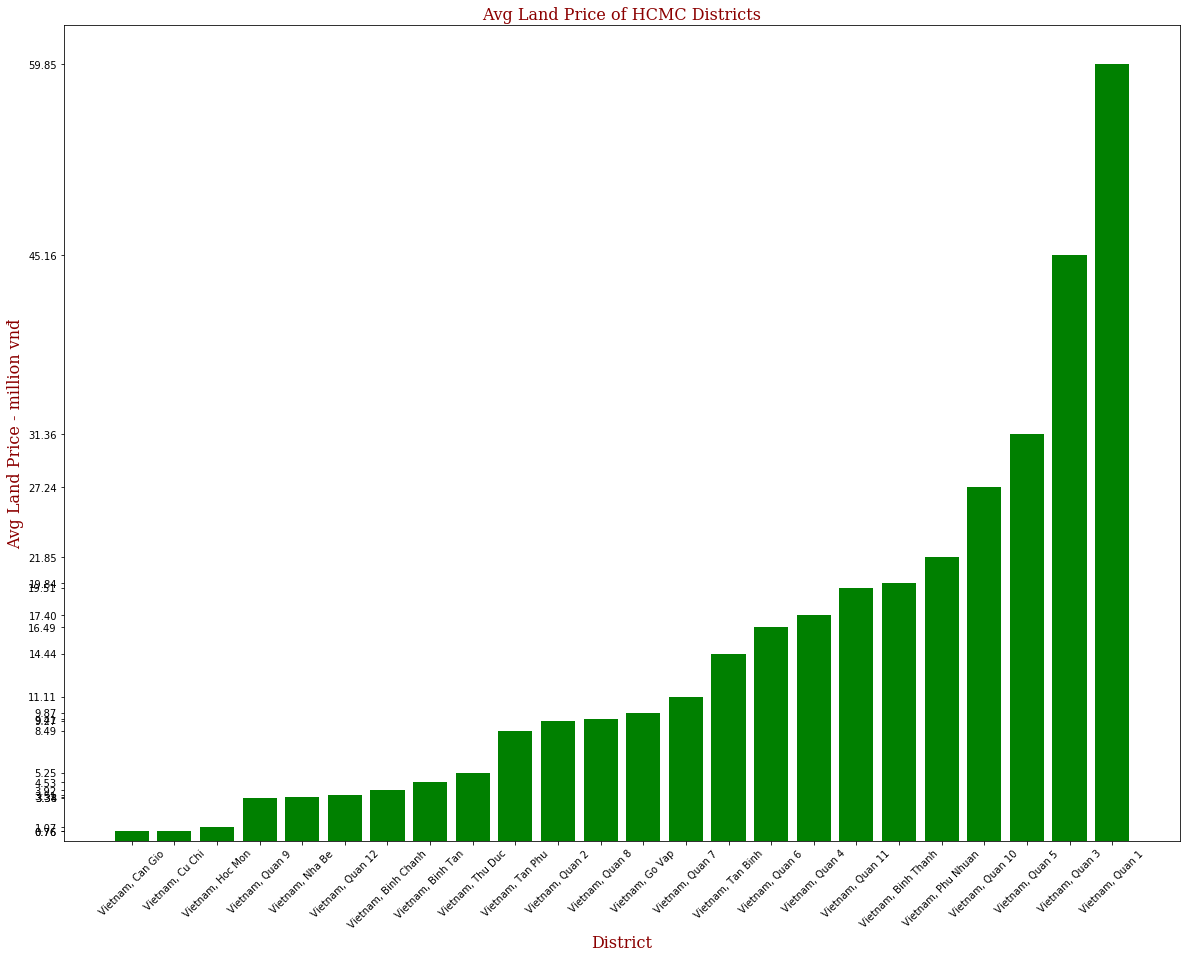

In [16]:
plt.figure(figsize=(20, 15))
a = plt.bar(hcm1.Bourough, hcm1.Avg_land_price, color=("Green"))
plt.xlabel("District", fontdict=font)
plt.ylabel("Avg Land Price - million vnđ", fontdict=font)
plt.xticks(rotation=45)
h = ['{:,.02f}'.format(x/1000000) for x in hcm1.Avg_land_price]
plt.yticks(hcm1.Avg_land_price, h)
plt.title("Avg Land Price of HCMC Districts", fontdict=font)
plt.show()

## Look at the charts:
- Can Gio has lowest population and also has lowest average land price  
- Nha Be also has low population (only higher than Can Gio)
- > We need to increase the population and give a chance for people to come there to buy hourses.

# Anaysis Can Gio

#### Define Foursquare Credentials and Version

In [17]:
CLIENT_ID = 'Q1FRAXZULEO3ESVPW2R0E1OJ0G30MF0D3X1JBPKOJB2KV0J5' # your Foursquare ID
CLIENT_SECRET = 'GXWRUQGK3FWR0E3D55TPHKMOYRKMDKC1OTZV10FJALW2M3QH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Q1FRAXZULEO3ESVPW2R0E1OJ0G30MF0D3X1JBPKOJB2KV0J5
CLIENT_SECRET:GXWRUQGK3FWR0E3D55TPHKMOYRKMDKC1OTZV10FJALW2M3QH


In [18]:
address = 'Vietnam, Can Gio'

geolocator = Nominatim(user_agent="cg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Can Gio are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Can Gio are 10.411044, 106.9537164.


### Now, let's get the top 10 venues that are in Can Gio within a radius of 10000 meters.

In [41]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 10000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=Q1FRAXZULEO3ESVPW2R0E1OJ0G30MF0D3X1JBPKOJB2KV0J5&client_secret=GXWRUQGK3FWR0E3D55TPHKMOYRKMDKC1OTZV10FJALW2M3QH&v=20180605&ll=10.411044,106.9537164&radius=10000&limit=100'

In [42]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c7cdcd81ed2196e48828e44'},
 'response': {'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': 10.501044090000091,
    'lng': 107.04505214119425},
   'sw': {'lat': 10.32104390999991, 'lng': 106.86238065880576}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e02d0021f6edc160233764f',
       'name': 'Bãi Biển 30/4, Cần Giờ Resort',
       'location': {'crossStreet': 'Can Gio Resort',
        'lat': 10.387207594878682,
        'lng': 106.92181035653263,
        'labeledLatLngs': [{'label': 'display',
          'lat': 10.387207594878682,
          'lng': 106.92181035653263}],
        'distance': 4386,
        

#### From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Now we are ready to clean the json and structure it into a pandas dataframe.

In [43]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,"Bãi Biển 30/4, Cần Giờ Resort",Resort,10.387208,106.921810
1,Quán Thanh Lịch,Vietnamese Restaurant,10.407084,106.966261
2,Can Gio Beach,Beach,10.387043,106.920352
3,Chợ Hải Sản Cần Giờ,Farmers Market,10.386876,106.919357
4,Chợ Hàng Dương,Market,10.386793,106.919384


#### And how many venues were returned by Foursquare?

In [44]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

7 venues were returned by Foursquare.


#### Explore Neighborhoods in Can Gio

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called CanGio_venues.

In [45]:
CanGio_venues = getNearbyVenues(names=nearby_venues['name'],
                                   latitudes=nearby_venues['lat'],
                                   longitudes=nearby_venues['lng']
                                  )

Bãi Biển 30/4, Cần Giờ Resort
Quán Thanh Lịch
Can Gio Beach
Chợ Hải Sản Cần Giờ
Chợ Hàng Dương
Đảo Khỉ, Cần Giờ
Phuong Nam Pearl Resort


#### Let's check the size of the resulting dataframe

In [46]:
CanGio_venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Bãi Biển 30/4, Cần Giờ Resort",5,5,5,5,5,5
Can Gio Beach,5,5,5,5,5,5
Chợ Hàng Dương,5,5,5,5,5,5
Chợ Hải Sản Cần Giờ,5,5,5,5,5,5
Phuong Nam Pearl Resort,1,1,1,1,1,1
Quán Thanh Lịch,4,4,4,4,4,4
"Đảo Khỉ, Cần Giờ",1,1,1,1,1,1


#### Let's find out how many unique categories can be curated from all the returned venues

In [47]:
print('There are {} uniques categories.'.format(len(CanGio_venues['Venue Category'].unique())))

There are 7 uniques categories.


## Analyze Each Neighborhood

In [48]:
# one hot encoding
CanGio_onehot = pd.get_dummies(CanGio_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
CanGio_onehot['Neighbourhood'] = CanGio_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [CanGio_onehot.columns[-1]] + list(CanGio_onehot.columns[:-1])
CanGio_onehot = CanGio_onehot[fixed_columns]

CanGio_onehot.head()

,Neighbourhood,Beach,Campground,Farmers Market,Market,Resort,Seafood Restaurant,Vietnamese Restaurant
0,"Bãi Biển 30/4, Cần Giờ Resort",0,0,0,0,1,0,0
1,"Bãi Biển 30/4, Cần Giờ Resort",0,0,0,0,1,0,0
2,"Bãi Biển 30/4, Cần Giờ Resort",1,0,0,0,0,0,0
3,"Bãi Biển 30/4, Cần Giờ Resort",0,0,0,1,0,0,0
4,"Bãi Biển 30/4, Cần Giờ Resort",0,0,1,0,0,0,0


In [29]:
CanGio_onehot.shape

(149, 27)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [49]:
CanGio_grouped = CanGio_onehot.groupby('Neighbourhood').mean().reset_index()
CanGio_grouped

,Neighbourhood,Beach,Campground,Farmers Market,Market,Resort,Seafood Restaurant,Vietnamese Restaurant
0,"Bãi Biển 30/4, Cần Giờ Resort",0.2,0.0,0.2,0.2,0.4,0.00,0.00
1,Can Gio Beach,0.2,0.0,0.2,0.2,0.4,0.00,0.00
2,Chợ Hàng Dương,0.2,0.0,0.2,0.2,0.4,0.00,0.00
3,Chợ Hải Sản Cần Giờ,0.2,0.0,0.2,0.2,0.4,0.00,0.00
4,Phuong Nam Pearl Resort,0.0,0.0,0.0,0.0,1.0,0.00,0.00
5,Quán Thanh Lịch,0.0,0.0,0.0,0.0,0.0,0.25,0.75
6,"Đảo Khỉ, Cần Giờ",0.0,1.0,0.0,0.0,0.0,0.00,0.00


In [50]:
CanGio_grouped.shape

(7, 8)

#### Let's print each neighborhood along with the top 3 most common venues

In [51]:
num_top_venues = 3

for hood in CanGio_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = CanGio_grouped[CanGio_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bãi Biển 30/4, Cần Giờ Resort----
            venue  freq
0          Resort   0.4
1           Beach   0.2
2  Farmers Market   0.2


----Can Gio Beach----
            venue  freq
0          Resort   0.4
1           Beach   0.2
2  Farmers Market   0.2


----Chợ Hàng Dương----
            venue  freq
0          Resort   0.4
1           Beach   0.2
2  Farmers Market   0.2


----Chợ Hải Sản Cần Giờ----
            venue  freq
0          Resort   0.4
1           Beach   0.2
2  Farmers Market   0.2


----Phuong Nam Pearl Resort----
        venue  freq
0      Resort   1.0
1       Beach   0.0
2  Campground   0.0


----Quán Thanh Lịch----
                   venue  freq
0  Vietnamese Restaurant  0.75
1     Seafood Restaurant  0.25
2                  Beach  0.00


----Đảo Khỉ, Cần Giờ----
            venue  freq
0      Campground   1.0
1           Beach   0.0
2  Farmers Market   0.0




In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [52]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = CanGio_grouped['Neighbourhood']

for ind in np.arange(CanGio_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(CanGio_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Bãi Biển 30/4, Cần Giờ Resort",Resort,Market,Farmers Market,Beach,Vietnamese Restaurant
1,Can Gio Beach,Resort,Market,Farmers Market,Beach,Vietnamese Restaurant
2,Chợ Hàng Dương,Resort,Market,Farmers Market,Beach,Vietnamese Restaurant
3,Chợ Hải Sản Cần Giờ,Resort,Market,Farmers Market,Beach,Vietnamese Restaurant
4,Phuong Nam Pearl Resort,Resort,Vietnamese Restaurant,Seafood Restaurant,Market,Farmers Market
5,Quán Thanh Lịch,Vietnamese Restaurant,Seafood Restaurant,Resort,Market,Farmers Market
6,"Đảo Khỉ, Cần Giờ",Campground,Vietnamese Restaurant,Seafood Restaurant,Resort,Market


#### Cluster Neighborhoods

In [53]:
# set number of clusters
kclusters = 3

CanGio_grouped_clustering = CanGio_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(CanGio_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 2, 0], dtype=int32)

In [54]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

CanGio_merged = nearby_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
CanGio_merged = CanGio_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='name')

CanGio_merged.head() # check the last columns!

,name,categories,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Bãi Biển 30/4, Cần Giờ Resort",Resort,10.387208,106.921810,1,Resort,Market,Farmers Market,Beach,Vietnamese Restaurant
1,Quán Thanh Lịch,Vietnamese Restaurant,10.407084,106.966261,2,Vietnamese Restaurant,Seafood Restaurant,Resort,Market,Farmers Market
2,Can Gio Beach,Beach,10.387043,106.920352,1,Resort,Market,Farmers Market,Beach,Vietnamese Restaurant
3,Chợ Hải Sản Cần Giờ,Farmers Market,10.386876,106.919357,1,Resort,Market,Farmers Market,Beach,Vietnamese Restaurant
4,Chợ Hàng Dương,Market,10.386793,106.919384,1,Resort,Market,Farmers Market,Beach,Vietnamese Restaurant


In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(CanGio_merged['lat'], CanGio_merged['lng'], CanGio_merged['name'], CanGio_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

#### Cluster 1

In [56]:
CanGio_merged.loc[CanGio_merged['Cluster Labels'] == 0, CanGio_merged.columns[[1] + list(range(5, CanGio_merged.shape[1]))]]

,categories,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Campground,Campground,Vietnamese Restaurant,Seafood Restaurant,Resort,Market


#### Cluster 2

In [57]:
CanGio_merged.loc[CanGio_merged['Cluster Labels'] == 1, CanGio_merged.columns[[1] + list(range(5, CanGio_merged.shape[1]))]]

,categories,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Resort,Resort,Market,Farmers Market,Beach,Vietnamese Restaurant
2,Beach,Resort,Market,Farmers Market,Beach,Vietnamese Restaurant
3,Farmers Market,Resort,Market,Farmers Market,Beach,Vietnamese Restaurant
4,Market,Resort,Market,Farmers Market,Beach,Vietnamese Restaurant
6,Resort,Resort,Vietnamese Restaurant,Seafood Restaurant,Market,Farmers Market


#### Cluster 3

In [58]:
CanGio_merged.loc[CanGio_merged['Cluster Labels'] == 2, CanGio_merged.columns[[1] + list(range(5, CanGio_merged.shape[1]))]]

,categories,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Vietnamese Restaurant,Vietnamese Restaurant,Seafood Restaurant,Resort,Market,Farmers Market


# Result

In [64]:
results = CanGio_merged.groupby('1st Most Common Venue').count()
results

,name,categories,lat,lng,Cluster Labels,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1st Most Common Venue,,,,,,,,,
Campground,1,1,1,1,1,1,1,1,1
Resort,5,5,5,5,5,5,5,5,5
Vietnamese Restaurant,1,1,1,1,1,1,1,1,1


In [66]:
type(results)

pandas.core.frame.DataFrame

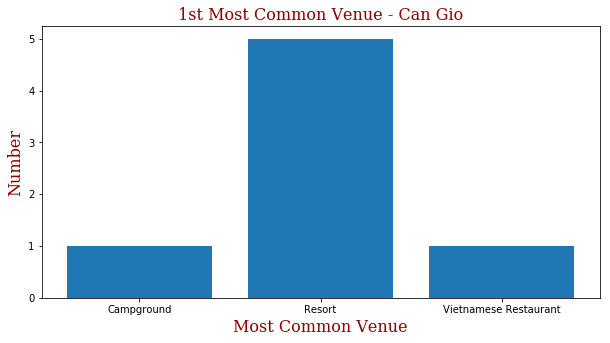

In [71]:
plt.figure(figsize=(10, 5))
plt.bar(results.index, results.name)
plt.xlabel("Most Common Venue", fontdict=font)
plt.ylabel("Number", fontdict=font)
plt.title("1st Most Common Venue - Can Gio", fontdict=font)
plt.show()